<a href="https://colab.research.google.com/github/MathiLogha/DocumentClustering/blob/main/document_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import wikipedia
articles=['Badminton','Artificial intelligence','European Central Bank','Financial technology','International Monetary Fund','Basketball','Swimming']
wiki_lst=[]
title=[]
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article).content)
   title.append(article)
print("examine content")
wiki_lst

loading content:  Badminton
loading content:  Artificial intelligence
loading content:  European Central Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
examine content


['Badminton is a racquet sport played using racquets to hit a shuttlecock across a net. Although it may be played with larger teams, the most common forms of the game are "singles" (with one player per side) and "doubles" (with two players per side). Badminton is often played as a casual outdoor activity in a yard or on a beach; formal games are played on a rectangular indoor court. Points are scored by striking the shuttlecock with the racquet and landing it within the opposing side\'s half of the court.\nEach side may only strike the shuttlecock once before it passes over the net. Play ends once the shuttlecock has struck the floor or if a fault has been called by the umpire, service judge, or (in their absence) the opposing side.The shuttlecock is a feathered or (in informal matches) plastic projectile which flies differently from the balls used in many other sports. In particular, the feathers create much higher drag, causing the shuttlecock to decelerate more rapidly. Shuttlecocks

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

In [ ]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '0001', '001', '0026', '003', '0030', '0036', '0040', '007', '0094', '011', '011082', '012', '013', '019', '0190', '01900692', '0198', '02', '03384', '04521', '0464', '0465065707', '05', '0563164654', '0572', '05830', '06', '06681', '0692', '07', '0706', '08', '08153', '08813', '0893', '09', '09540090310001655110', '10', '100', '1002', '100450', '1007', '100k', '101', '1013298507114', '1016', '10168773', '1017', '1023', '1039480085', '105', '106', '1080', '1083694322', '108771', '1093', '10m', '11', '110', '1109', '1110727808', '11229402', '1124', '1126', '113', '1131', '114', '1145', '115', '11573548', '1162', '117', '11715509', '1197', '11th', '11v', '12', '120', '1202', '121', '122', '1228', '123', '125', '1259433', '126', '127', '13', '1309', '1332', '133646', '134777', '14', '1404', '143', '143452957', '1438', '1439504789', '144', '145', '1452734', '145b', '149', '1498103', '14987656', '14th', '15', '150', '1500', '151', '1513681', '153', '1538', '1561', '1563803', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X[0,])

  (0, 2226)	0.0028571028346184016
  (0, 4529)	0.0013571736193838974
  (0, 4526)	0.0023716407187162254
  (0, 7757)	0.0023716407187162254
  (0, 7038)	0.002027199865960263
  (0, 7795)	0.0028571028346184016
  (0, 1435)	0.0028571028346184016
  (0, 4633)	0.0023716407187162254
  (0, 2209)	0.0023716407187162254
  (0, 1740)	0.0028571028346184016
  (0, 5196)	0.001541737750058087
  (0, 5301)	0.004054399731920526
  (0, 1004)	0.0023716407187162254
  (0, 7365)	0.0023716407187162254
  (0, 4996)	0.0028571028346184016
  (0, 5467)	0.0023716407187162254
  (0, 273)	0.0017600307843187823
  (0, 7938)	0.0028571028346184016
  (0, 4312)	0.0028571028346184016
  (0, 329)	0.0028571028346184016
  (0, 6895)	0.0028571028346184016
  (0, 6599)	0.0028571028346184016
  (0, 1690)	0.0017600307843187823
  (0, 8144)	0.001541737750058087
  (0, 611)	0.0028571028346184016
  :	:
  (0, 3420)	0.05878879611284763
  (0, 5203)	0.19515939426024634
  (0, 3337)	0.001541737750058087
  (0, 1888)	0.01079216425040661
  (0, 4937)	0.01556485

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

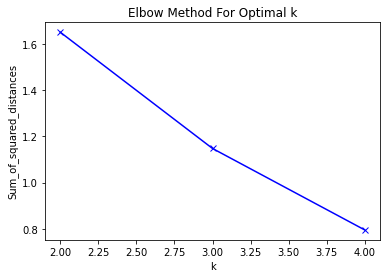

In [ ]:
Sum_of_squared_distances = []
K = range(2,5)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
0                    Badminton        0
3         Financial technology        1
2        European Central Bank        2
4  International Monetary Fund        2
1      Artificial intelligence        3
6                     Swimming        4
5                   Basketball        5


Cluster: 0
Titles
Badminton


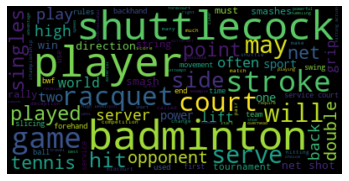

Cluster: 1
Titles
Financial technology


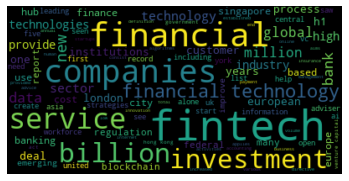

Cluster: 2
Titles
      European Central Bank
International Monetary Fund


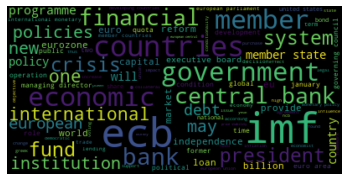

Cluster: 3
Titles
Artificial intelligence


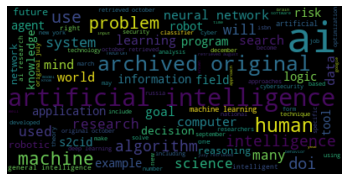

Cluster: 4
Titles
Swimming


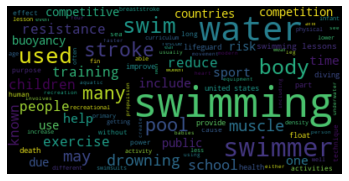

Cluster: 5
Titles
Basketball


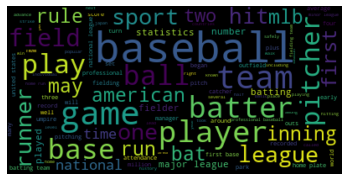

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving doc.txt to doc (6).txt


In [ ]:
text = open('doc.txt', encoding='utf-8').read().lower()
print('corpus length:', len(text))

corpus length: 1521


In [ ]:
from numpy import loadtxt

#import text file into NumPy array
#data = loadtxt('new.txt',dtype='str')
data=[]
wiki_lst.append(text)
#display content of text file
#print(data)
wiki_lst

['Badminton is a racquet sport played using racquets to hit a shuttlecock across a net. Although it may be played with larger teams, the most common forms of the game are "singles" (with one player per side) and "doubles" (with two players per side). Badminton is often played as a casual outdoor activity in a yard or on a beach; formal games are played on a rectangular indoor court. Points are scored by striking the shuttlecock with the racquet and landing it within the opposing side\'s half of the court.\nEach side may only strike the shuttlecock once before it passes over the net. Play ends once the shuttlecock has struck the floor or if a fault has been called by the umpire, service judge, or (in their absence) the opposing side.The shuttlecock is a feathered or (in informal matches) plastic projectile which flies differently from the balls used in many other sports. In particular, the feathers create much higher drag, causing the shuttlecock to decelerate more rapidly. Shuttlecocks

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
Y = vectorizer.fit_transform(wiki_lst)

In [ ]:
print(vectorizer.get_feature_names())
print(Y.shape)

['00', '000', '0001', '001', '0026', '003', '0030', '0036', '0040', '007', '0094', '011', '011082', '012', '013', '019', '0190', '01900692', '0198', '02', '03384', '04521', '0464', '0465065707', '05', '0563164654', '0572', '05830', '06', '06681', '0692', '07', '0706', '08', '08153', '08813', '0893', '09', '09540090310001655110', '10', '100', '1002', '100450', '1007', '100k', '101', '1013298507114', '1016', '10168773', '1017', '1023', '1039480085', '105', '106', '1080', '1083694322', '108771', '1093', '10m', '11', '110', '1109', '1110727808', '11229402', '1124', '1126', '113', '1131', '114', '1145', '115', '11573548', '1162', '117', '11715509', '1197', '11th', '11v', '12', '120', '1202', '121', '122', '1228', '123', '125', '1259433', '126', '127', '13', '1309', '1332', '133646', '134777', '14', '1404', '143', '143452957', '1438', '1439504789', '144', '145', '1452734', '145b', '149', '1498103', '14987656', '14th', '15', '150', '1500', '151', '1513681', '153', '1538', '1561', '1563803', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(Y[0,])

  (0, 2235)	0.002940035600305028
  (0, 4550)	0.0014691674351030002
  (0, 4547)	0.0024639792874872994
  (0, 7789)	0.0024639792874872994
  (0, 7068)	0.00212621195822398
  (0, 7827)	0.002940035600305028
  (0, 1442)	0.002940035600305028
  (0, 4655)	0.0024639792874872994
  (0, 2218)	0.0024639792874872994
  (0, 1748)	0.002940035600305028
  (0, 5221)	0.0016501556454062512
  (0, 5327)	0.00425242391644796
  (0, 1008)	0.0024639792874872994
  (0, 7396)	0.0024639792874872994
  (0, 5020)	0.002940035600305028
  (0, 5493)	0.0024639792874872994
  (0, 274)	0.0018642192635545337
  (0, 7971)	0.002940035600305028
  (0, 4333)	0.002940035600305028
  (0, 330)	0.002940035600305028
  (0, 6925)	0.002940035600305028
  (0, 6629)	0.002940035600305028
  (0, 1698)	0.0018642192635545337
  (0, 8177)	0.0016501556454062512
  (0, 613)	0.002940035600305028
  :	:
  (0, 3436)	0.06166014678849542
  (0, 5228)	0.19137819121192914
  (0, 3352)	0.0016501556454062512
  (0, 1897)	0.01155108951784376
  (0, 4961)	0.017061048109858118

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(Y)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(labels)),columns=['cluster'])
print(wiki_cl.sort_values(by=['cluster']))

   cluster
0        0
6        1
7        1
2        2
4        2
1        3
3        4
5        5
